###  END SEMESTER ASSESSMENT (ESA)
## MBA

### Linear Predictive models



### Problem Statement:
<u>**Objective** </u>

What determines the salary and the jobs that engineers are offered right after graduation? Various factors such as college grades, candidate skills, the proximity of the college to industrial hubs and market conditions for specific industries determine this. On the basis of these various factors, your objective is to determine the salary of an engineering graduate in India.

#### Data Description
- ID: A unique ID to identify a candidate
- Salary: Annual CTC offered to the candidate (in INR)
- Gender: Candidate's gender
- 10percentage: Overall marks obtained in grade 10 examinations
- 12percentage: Overall marks obtained in grade 12 examinations
- CollegeTier: Each college has been annotated as 1 or 2. The annotations have been computed from the average AMCAT scores obtained by the students in the college/university. Colleges with an average score above a threshold are tagged as 1 and others as 2.
- CollegeGPA: Aggregate GPA at graduation
- CollegeCityTier: The tier of the city in which the college is located in. This is annotated based on the population of the cities.
- GraduationYear: Year of graduation (Bachelor's degree)
- Logical: Score in AMCAT Logical ability section
- Quant: Score in AMCAT's Quantitative ability section
- Domain: Scores in AMCAT's domain module
- agreeableness: Scores in one of the sections of AMCAT's personality test
- openesstoexperience: Scores in one of the sections of AMCAT's personality test         


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

#import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

## Section B (50 marks)

#### 2a Read the dataset and perform the following (10 marks)
i)Read the file and identify the categorical and numerical variable (2 mark)

ii)Identify the missing values and see for any patterns using heatmap    (3 marks)

iii)Implement a strategy to deal with the missing values.(2 marks)

iv) Encode the categorical variables   (3 marks)
     
     




In [2]:
# i) Read the dataset.
df = pd.read_csv("./Dataset/Engineering_graduate_salary.csv")

In [3]:
df.head()

,ID,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,Logical,Quant,Domain,agreeableness,openess_to_experience,Salary
0,604399,f,87.80,2009,84.00,6920,1,73.82,6920,1,2013.0,665,810,0.694479,0.3789,0.2889,445000
1,988334,m,57.00,2010,64.50,6624,2,65.00,6624,0,2014.0,435,210,0.342315,0.0459,-0.2859,110000
2,301647,m,77.33,2007,85.17,9084,2,61.94,9084,0,2011.0,475,505,0.824666,-0.1232,-0.2875,255000
3,582313,m,84.30,2009,86.00,8195,1,80.40,8195,1,2013.0,620,635,0.990009,0.2124,0.4805,420000
4,339001,f,82.00,2008,75.00,4889,2,NaN,4889,1,2012.0,495,365,0.278457,-0.7473,0.1864,200000


In [4]:
#ii) identify the categorical and numerical variable
df.dtypes

ID                         int64
Gender                    object
10percentage             float64
12graduation               int64
12percentage             float64
CollegeID                  int64
CollegeTier                int64
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
GraduationYear           float64
Logical                    int64
Quant                      int64
Domain                   float64
agreeableness            float64
openess_to_experience    float64
Salary                     int64
dtype: object

In [5]:
#iii) Identify the missing values and see for any patterns using heatmap

In [6]:
df.isnull().sum()

ID                       0
Gender                   0
10percentage             2
12graduation             0
12percentage             4
CollegeID                0
CollegeTier              0
collegeGPA               3
CollegeCityID            0
CollegeCityTier          0
GraduationYear           1
Logical                  0
Quant                    0
Domain                   0
agreeableness            0
openess_to_experience    0
Salary                   0
dtype: int64

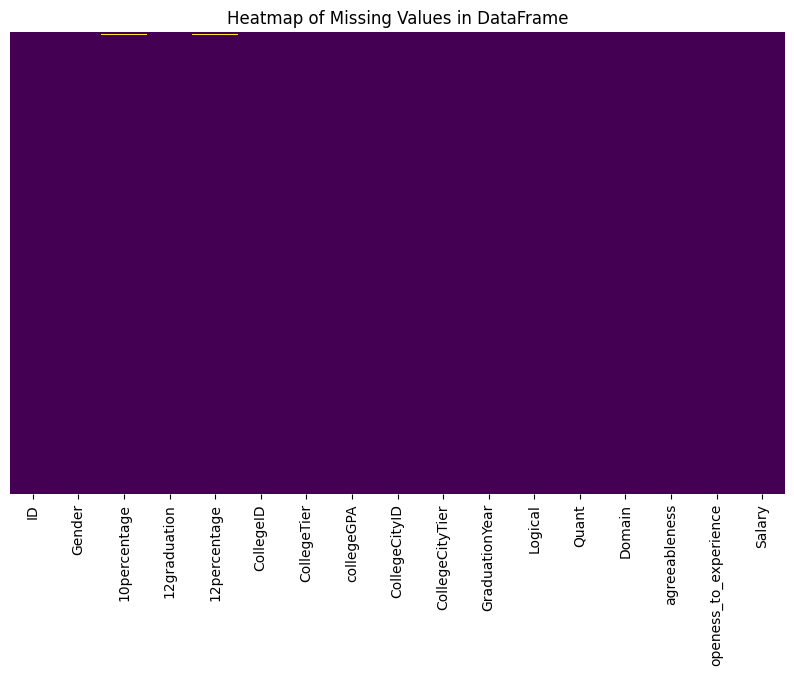

In [7]:
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values in DataFrame')
plt.show()

#### Variables 10percentage(numerical),12percentage(numerical), collegeGPA (numerical),GraduationYear(numerical) have missing values.

In [8]:
#iv) Implement a strategy to deal with the missing values.

# Usually missing value treatment can be done for numerical variables by imputing the missing values and replacing by mean/mdeian
# Let's visualize the distribution of data


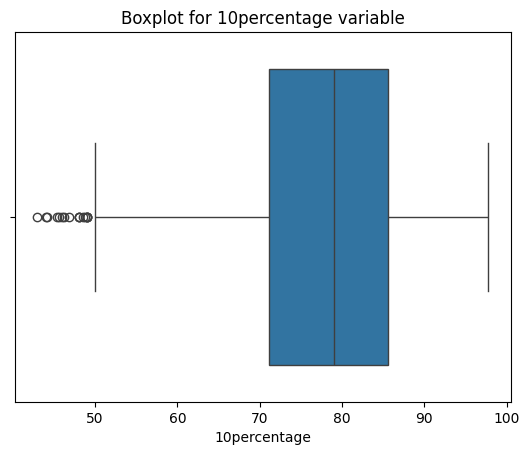

In [9]:
sns.boxplot(df['10percentage'],orient='h')
plt.title("Boxplot for 10percentage variable")
plt.show()

#### The distribution of data across boxplot does not look uniform as the median of the boxplot is not at center, therfore we can consider the median while imputing missing values. 

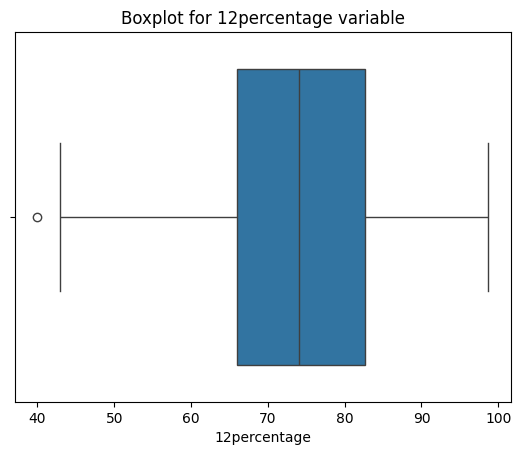

In [10]:
sns.boxplot(df['12percentage'],orient='h')
plt.title("Boxplot for 12percentage variable")
plt.show()

#### The distribution of data looks somewhat closer to normal distribution as the median lies in the middle of the boxplot, therfore we can consider the mean while imputing missing values. 

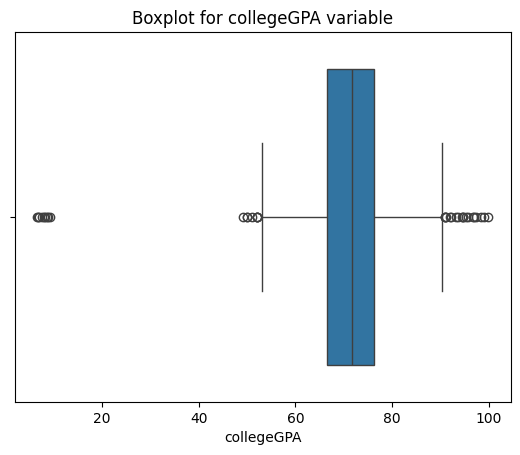

In [11]:
sns.boxplot(df['collegeGPA'],orient='h')
plt.title("Boxplot for collegeGPA variable")
plt.show()

#### There are outliers on both lower and upper side. However, the distribution of data looks somewhat closer to normal distribution, as the median lies in the centre of the boxplot. Therfore we can consider the mean while imputing missing values. 

In [12]:
#Treating missing values

#Imputing missing values for variable 10percentage using median
df['10percentage'] = df['10percentage'].fillna(df['10percentage'].median())

#Imputing missing values for variable 12percentage using mean
df['12percentage'] = df['12percentage'].fillna(df['12percentage'].mean())

#Imputing missing values for variable collegeGPA using mean
df['collegeGPA'] = df['collegeGPA'].fillna(df['collegeGPA'].mean())

#Imputing missing values for variable GraduationYear using mean
df['GraduationYear'] = df['GraduationYear'].fillna(df['GraduationYear'].mean())



In [13]:
df.isnull().sum()

ID                       0
Gender                   0
10percentage             0
12graduation             0
12percentage             0
CollegeID                0
CollegeTier              0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
GraduationYear           0
Logical                  0
Quant                    0
Domain                   0
agreeableness            0
openess_to_experience    0
Salary                   0
dtype: int64

#### All missing values have been imputed.

In [14]:
#v) Encode the categorical variables

df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [15]:
df_num.head()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,Logical,Quant,Domain,agreeableness,openess_to_experience,Salary
0,604399,87.80,2009,84.00,6920,1,73.820000,6920,1,2013.0,665,810,0.694479,0.3789,0.2889,445000
1,988334,57.00,2010,64.50,6624,2,65.000000,6624,0,2014.0,435,210,0.342315,0.0459,-0.2859,110000
2,301647,77.33,2007,85.17,9084,2,61.940000,9084,0,2011.0,475,505,0.824666,-0.1232,-0.2875,255000
3,582313,84.30,2009,86.00,8195,1,80.400000,8195,1,2013.0,620,635,0.990009,0.2124,0.4805,420000
4,339001,82.00,2008,75.00,4889,2,71.521452,4889,1,2012.0,495,365,0.278457,-0.7473,0.1864,200000


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2998.0,664892.583389,364895.076716,11244.0000,333464.750000,639694.500000,995177.000000,1.297877e+06
10percentage,2998.0,77.666007,10.002562,43.0000,71.140000,78.965000,85.600000,9.776000e+01
12graduation,2998.0,2008.080720,1.631814,1998.0000,2007.000000,2008.000000,2009.000000,2.012000e+03
12percentage,2998.0,74.347929,11.112586,40.0000,66.000000,74.000000,82.600000,9.870000e+01
CollegeID,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
CollegeTier,2998.0,1.924616,0.264053,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,2998.0,71.521452,8.113395,6.6300,66.600000,71.800000,76.300000,9.993000e+01
CollegeCityID,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
CollegeCityTier,2998.0,0.296197,0.456655,0.0000,0.000000,0.000000,1.000000,1.000000e+00
GraduationYear,2998.0,2011.939273,36.780563,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03


In [17]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df_num_scaled = standard_scaler.fit_transform(df_num)

df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num.columns)

In [51]:
df_num_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2998.0,-1.208728e-16,1.000167,-1.791632,-0.908434,-0.069067,0.905300,1.734992
10percentage,2998.0,-2.192302e-17,1.000167,-3.466291,-0.652542,0.129888,0.793328,2.009220
12graduation,2998.0,-6.411001e-15,1.000167,-6.178645,-0.662392,-0.049475,0.563442,2.402193
12percentage,2998.0,-5.433353e-16,1.000167,-3.091419,-0.751339,-0.031315,0.742712,2.191761
CollegeID,2998.0,1.422033e-17,1.000167,-1.090539,-0.980767,-0.247646,0.756319,2.763674
CollegeTier,2998.0,-3.720988e-16,1.000167,-3.502212,0.285534,0.285534,0.285534,0.285534
collegeGPA,2998.0,2.767040e-16,1.000167,-7.999398,-0.606685,0.034338,0.589068,3.502022
CollegeCityID,2998.0,1.422033e-17,1.000167,-1.090539,-0.980767,-0.247646,0.756319,2.763674
CollegeCityTier,2998.0,-5.925140e-17,1.000167,-0.648732,-0.648732,-0.648732,1.541469,1.541469
GraduationYear,2998.0,-1.354487e-15,1.000167,-54.710281,0.001651,0.028844,0.056037,0.137615


In [18]:
dummy_var = pd.get_dummies(data=df_cat, drop_first=True)

In [19]:
dummy_var.head()

,Gender_m
0,False
1,True
2,True
3,True
4,False


### 2b)
 I. Create the train and test data set with suitable y and x variables – 4marks

 II. Develop a linear regression model based on the variables – 6 marks

 III. Based on the output identify which variables are significant and which are insignificant (use   
      alpha =.05)– 6 marks
      
IV. Check for correlation among the numeric variables, based on the correlation accordingly decide which variables to be included, use correlation of .5 as cutoff.  4 - marks

V. Based on the variables accordingly remove insignificant variables and reconduct analysis - 6 marks

VI. Conclude accordingly using the output and provide which variables would affect the regression
model – 4 marks

In [20]:
#i) Create the train and test data set with suitable y and x variables – 4marks

In [21]:
dummy_var['Gender_m'] = dummy_var['Gender_m'].astype(int)
dummy_var.head()

,Gender_m
0,0
1,1
2,1
3,1
4,0


In [22]:
df_num = df_num.drop('Salary', axis=1 )
df_num.head()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,Logical,Quant,Domain,agreeableness,openess_to_experience
0,604399,87.80,2009,84.00,6920,1,73.820000,6920,1,2013.0,665,810,0.694479,0.3789,0.2889
1,988334,57.00,2010,64.50,6624,2,65.000000,6624,0,2014.0,435,210,0.342315,0.0459,-0.2859
2,301647,77.33,2007,85.17,9084,2,61.940000,9084,0,2011.0,475,505,0.824666,-0.1232,-0.2875
3,582313,84.30,2009,86.00,8195,1,80.400000,8195,1,2013.0,620,635,0.990009,0.2124,0.4805
4,339001,82.00,2008,75.00,4889,2,71.521452,4889,1,2012.0,495,365,0.278457,-0.7473,0.1864


In [23]:
y = df['Salary']

X = pd.concat([df_num,dummy_var], axis=1)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [25]:
# ii) Develop a linear regression model based on the variables

In [26]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

regression_model.fit(X_train,y_train)

LinearRegression()

In [27]:
# iii) Significant variables and non signiifcant alpha=0.5

import statsmodels.api as sm

X = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.767
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              456.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):                        0.00
Time:                        22:48:42   Log-Likelihood:                         -28312.
No. Observations:                2098   AIC:                                  5.665e+04
Df Residuals:                    2083   BIC:                                  5.674e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ID                       -0.1452      0.011    -12.917      0.000      -0.167      -0.123
10percentage           1679.3038    530.606      3.165      0.002     638.731    2719.877
12graduation          -1346.2303   4296.445     -0.313      0.754   -9772.004    7079.543
12percentage           1232.7082    477.502      2.582      0.010     296.277    2169.139
CollegeID                -0.3353      0.425     -0.790      0.430      -1.168       0.497
CollegeTier           -7.939e+04   1.55e+04     -5.119      0.000    -1.1e+05    -4.9e+04
collegeGPA             1520.2483    529.544      2.871      0.004     481.758    2558.739
CollegeCityID            -0.3353      0.425     -0.790      0.430      -1.168       0.497
CollegeCityTier       -1.078e+04   8526.233     -1.264      0.206   -2.75e+04    5941.751
GraduationYear         1340.3682   4281.953      0.313      0.754   -7056.985    9737.721
Logical                 257.8916     53.665      4.806      0.000     152.650     363.134
Quant                   132.0336     39.339      3.356      0.001      54.885     209.182
Domain                 2.135e+04   8866.658      2.407      0.016    3956.735    3.87e+04
agreeableness          1.047e+04   5162.208      2.028      0.043     347.586    2.06e+04
openess_to_experience -1850.0471   4927.324     -0.375      0.707   -1.15e+04    7812.944
Gender_m               3.525e+04   9414.867      3.744      0.000    1.68e+04    5.37e+04
==============================================================================
Omnibus:                     2543.474   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           564510.995
Skew:                           6.117   Prob(JB):                         0.00
Kurtosis:                      82.423   Cond. No.                     8.81e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.54e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Observations: 
##### From the above output below variables have significance 
###### 12graduation, CollegeID, CollegeCityID,CollegeCityTier, GraduationYear, openess_to_experience
###### Remaining  variables don't have significance







In [28]:
# iv) Correlation more than .5 as cutoff

<Axes: >

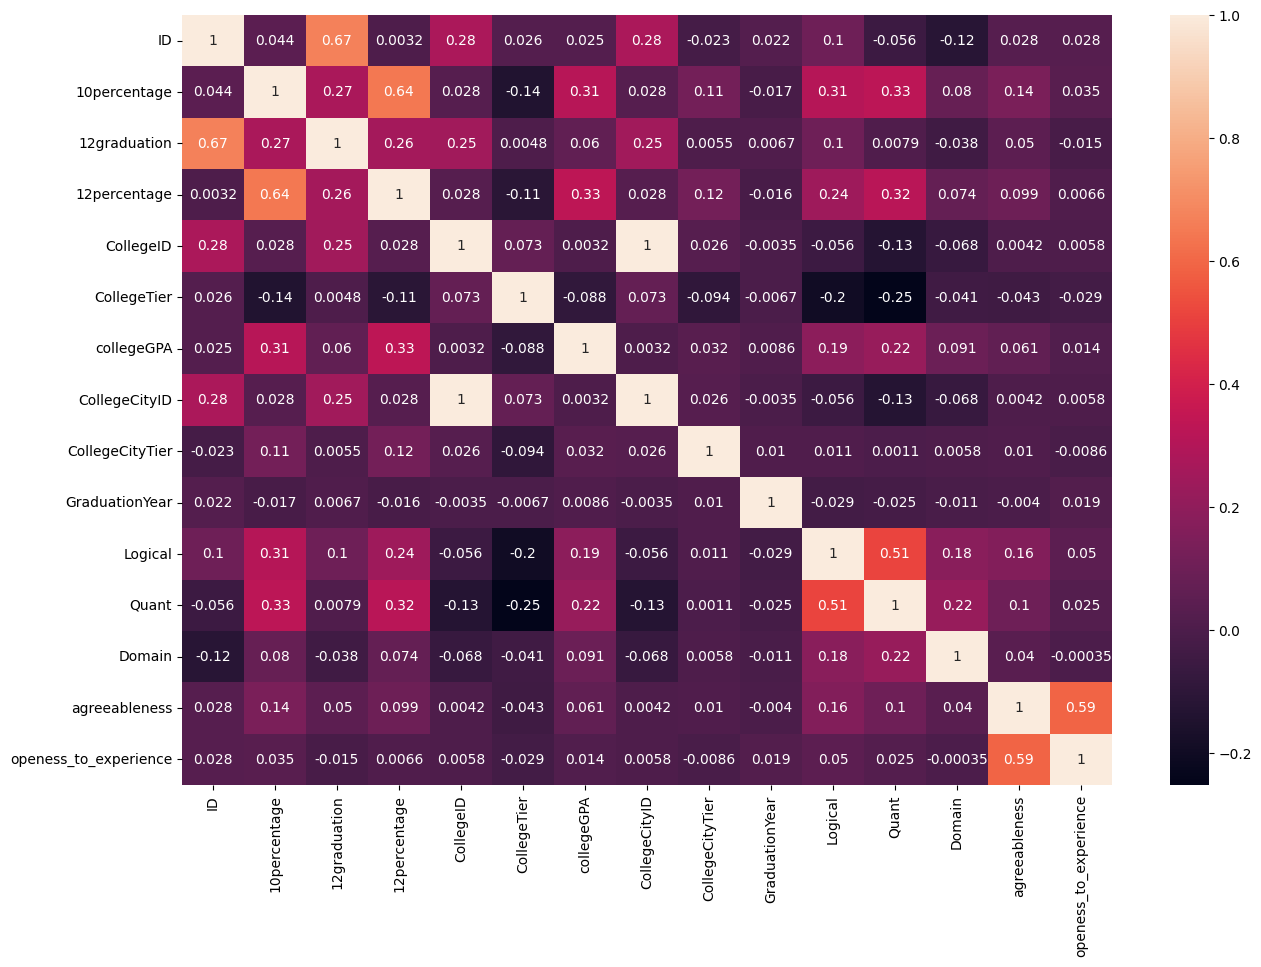

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_num.corr(), annot=True)

#### Given the cutoff of 0.5. 
###### 1> Variable ID, CollegeID and CollegeCityID are non-significant.
###### 2> There is a high correlation between variables 10percentage and 12percentage.As we are predicting salary after graduation, therefore, we can drop 10percentage.
###### 3> There is a high correlation between variables Logical and Quant. We can drop Quant.
###### 4> There is a high correlation between variables agreeableness and openess_to_experience. We can drop agreeableness.

In [30]:
# v) Vairables to be removed based on correlation analysis

In [31]:
df_num.drop(['ID','CollegeID','CollegeCityID','10percentage','Quant','agreeableness'], axis=1)
df_num.dtypes

ID                         int64
10percentage             float64
12graduation               int64
12percentage             float64
CollegeID                  int64
CollegeTier                int64
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
GraduationYear           float64
Logical                    int64
Quant                      int64
Domain                   float64
agreeableness            float64
openess_to_experience    float64
dtype: object

In [32]:
# vi) Develop a linear regression model based on the variables

# Create a new X & y after droping the variables

X_new = pd.concat([df_num,dummy_var], axis=1)

y_new = y

from sklearn.model_selection import train_test_split

X_train_new, X_test_new,y_train_new, y_test_new = train_test_split(X_new,y_new, test_size=0.3, random_state=1)

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_new,y_train_new)

LinearRegression()

In [34]:
# 2c Apply Lasso regression and determine the significant variables – 10 marks

In [35]:
for idx, col_name in enumerate(X_train_new.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for ID is -0.1043807477904089
The coefficient for 10percentage is 1782.454711367612
The coefficient for 12graduation is -2568.0386417859118
The coefficient for 12percentage is 1294.6558595599058
The coefficient for CollegeID is -0.2819276692158102
The coefficient for CollegeTier is -84206.28364469898
The coefficient for collegeGPA is 1543.847332055423
The coefficient for CollegeCityID is -0.2819276751686804
The coefficient for CollegeCityTier is -12156.171659443004
The coefficient for GraduationYear is -11582.930106550844
The coefficient for Logical is 249.80786803839524
The coefficient for Quant is 134.33290135590107
The coefficient for Domain is 23579.187747379023
The coefficient for agreeableness is 11133.534922319333
The coefficient for openess_to_experience is -3332.758692809663
The coefficient for Gender_m is 35234.505197925755


In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.25)

lasso.fit(X_train_new,y_train_new)

Lasso(alpha=0.25)

In [37]:
print ("Lasso model Coefficients:", (lasso.coef_))

Lasso model Coefficients: [-1.04383045e-01  1.78244513e+03 -2.56811943e+03  1.29464837e+03
 -8.21620402e-01 -8.42017235e+04  1.54383254e+03  2.57745626e-01
 -1.21546555e+04 -1.15820702e+04  2.49811086e+02  1.34336425e+02
  2.35775967e+04  1.11327762e+04 -3.33203766e+03  3.52330583e+04]


## Section C (20 marks)

**The data definition is as follows:** <br>

**Y**: Y =0 if bankruptcy after 2 years, 1 if solvent after 2 years

**X1**:  Retained Earnings/Total Assets

**X2**: Earnings before Interest and Taxes/Total Assets

**X3**: Sales / Total Assets

In [38]:
# i)  Read the data set and check for missing values  -3 marks

In [39]:
bank = pd.read_csv("./Dataset/bankruptcy.csv")

In [40]:
bank.head()

,Y,X1,X2,X3
0,0,-62.8,-89.5,1.7
1,0,3.3,-3.5,1.1
2,0,-120.8,-103.2,2.5
3,0,-18.1,-28.8,1.1
4,0,-3.8,-50.6,0.9


In [41]:
bank.isnull().sum()

Y     0
X1    0
X2    0
X3    0
dtype: int64

#### There are no missing values.

In [42]:
# ii) Split the data set into train and test – 4 marks

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       66 non-null     int64  
 1   X1      66 non-null     float64
 2   X2      66 non-null     float64
 3   X3      66 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.2 KB


In [43]:
y = bank['Y']
X = bank.drop('Y', axis =1)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

In [45]:
# iii) Analyze the data set  based on the output,
# Use alpha = .05, to identify the significant variables, what do you conclude about the model

In [46]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [47]:
# Performing Linear Regression via statsmodels OLS by adding alpha of 0.05
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     7.873
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           0.000543
Time:                        22:48:43   Log-Likelihood:                -11.338
No. Observations:                  33   AIC:                             30.68
Df Residuals:                      29   BIC:                             36.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1892      0.132      1.432      0.163      -0.081       0.459
X1             0.0019      0.001      1.841      0.076      -0.000       0.004
X2             0.0042      0.002      2.223      0.034       0.000       0.008
X3             0.1609      0.071      2.279      0.030       0.016       0.305
==============================================================================
Omnibus:                        6.788   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                2.393
Skew:                           0.272   Prob(JB):                        0.302
Kurtosis:                       1.799   Cond. No.                         229.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# iv) By using a logistic regression model. Calculate the odd for each of the variable and interpret the meaning – 5 marks

In [49]:
# Performing Logistic Regression via statsmodels OLS by adding alpha of 0.05

model_log = sm.Logit(y_train,X_train).fit()
model_log.summary()

         Current function value: 0.000000
         Iterations: 35


/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarnin

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                   33
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                   1.000
Time:                        22:48:43   Log-Likelihood:            -1.2479e-07
converged:                      False   LL-Null:                       -20.243
Covariance Type:            nonrobust   LLR p-value:                 8.409e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -137.2128    5.5e+08  -2.49e-07      1.000   -1.08e+09    1.08e+09
X1             2.4712   8.74e+06   2.83e-07      1.000   -1.71e+07    1.71e+07
X2             4.2124   4.69e+08   8.99e-09      1.000   -9.19e+08    9.19e+08
X3            84.8419   2.75e+09   3.09e-08      1.000   -5.39e+09    5.39e+09
==============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [50]:
odds_ratios = np.exp(model_log.params)
print(odds_ratios)

const    2.565829e-60
X1       1.183678e+01
X2       6.751589e+01
X3       7.020632e+36
dtype: float64
